In [1]:
import tensorly as tl
from tensorly.decomposition import parafac,tucker

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (20,15)

import json
import dill

In [2]:
mumbai = '../data/mumbai-hexclusters-2019-4-All-HourlyAggregate.csv'
bengaluru = '../data/bangalore-wards-2019-4-All-HourlyAggregate.csv'
delhi = '../data/new_delhi-wards-2018-4-All-HourlyAggregate.csv'
kolkata = '../data/kolkata-wards-2019-4-All-HourlyAggregate.csv'
hyderabad = '../data/hyderabad-wards-2019-4-All-HourlyAggregate.csv'

In [3]:
def explained(tensor, factors, mask, algo):
    if algo=='cp':
        error_tensor = tensor - tl.cp_to_tensor(factors)
    elif algo=='tucker':
        error_tensor = tensor - tl.tucker_to_tensor(factors)
        
    error = tl.norm(error_tensor * mask)
    
    total_variance = tl.norm(tensor*mask)**2
    explained_variance = total_variance - error**2
    explained_variance_normalized = explained_variance/total_variance
    
    return explained_variance_normalized

In [4]:
def fillTensor(x,nptensor):
    nptensor[x.dstid-1 ,x.sourceid-1, x.hod] = x.mean_travel_time
    return 0

In [5]:
def decompose(cityfile):
    df = pd.read_csv(cityfile)
    df_nodes = max(df.sourceid.max(), df.dstid.max())
    print('df max nodes ->', df_nodes)

    dfMean = df.groupby('hod').mean()

    dfTensor = np.zeros( (df_nodes, df_nodes, 24))
    df.pipe(lambda x: fillTensor(x, dfTensor))

    print(dfTensor[100,100,23])
    print(df[ df.sourceid == 101][df.dstid ==101].mean_travel_time)

    print( (df.mean_travel_time == 0).any())
    df_mask = (dfTensor!=0)*1

    df_cp = []
    for k in range(1,5):
        df_factors , df_errors = parafac(dfTensor, rank=k, return_errors = 1, orthogonalise=True, mask=df_mask)
        df_cp.append(df_factors)
        print(k,end='\t')


    df_tucker=[]
    for k in range(1,5):
        df_factors  = tucker(dfTensor, rank=k,  mask=df_mask)
        df_tucker.append(df_factors)
        print(k,end='\t')

    df_cp_explained = [explained(dfTensor, f, df_mask, algo='cp') for f in df_cp ]
    df_tucker_explained = [explained(dfTensor, f, df_mask, algo='tucker') for f in df_tucker ]
    
    return df_cp_explained,df_tucker_explained

In [6]:
mumbai_decomp = decompose(mumbai)

df max nodes -> 695
302.33
3932571    302.33
Name: mean_travel_time, dtype: float64
False


/home/sampad/pyv/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':


1	2	3	4	

/home/sampad/pyv/lib/python3.6/site-packages/tensorly/tucker_tensor.py:357: RuntimeWarning: Given only one int for 'rank' for decomposition a tensor of order 3. Using this rank for all modes.
  warnings.warn(message, RuntimeWarning)
/home/sampad/pyv/lib/python3.6/site-packages/tensorly/decomposition/_tucker.py:71: Warning: Masking occurs after initialization. Therefore, random initialization is recommended.
  warnings.warn(message, Warning)


1	2	3	4	

In [7]:
bengaluru_decomp = decompose(bengaluru)

df max nodes -> 198
326.11
176741    326.11
Name: mean_travel_time, dtype: float64
False


/home/sampad/pyv/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':


1	2	3	4	

/home/sampad/pyv/lib/python3.6/site-packages/tensorly/tucker_tensor.py:357: RuntimeWarning: Given only one int for 'rank' for decomposition a tensor of order 3. Using this rank for all modes.
  warnings.warn(message, RuntimeWarning)
/home/sampad/pyv/lib/python3.6/site-packages/tensorly/decomposition/_tucker.py:71: Warning: Masking occurs after initialization. Therefore, random initialization is recommended.
  warnings.warn(message, Warning)


1	2	3	4	

In [8]:
delhi_decomp = decompose(delhi) 

df max nodes -> 290
493.01
125558    493.01
Name: mean_travel_time, dtype: float64
False


/home/sampad/pyv/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':


1	2	3	4	

/home/sampad/pyv/lib/python3.6/site-packages/tensorly/tucker_tensor.py:357: RuntimeWarning: Given only one int for 'rank' for decomposition a tensor of order 3. Using this rank for all modes.
  warnings.warn(message, RuntimeWarning)
/home/sampad/pyv/lib/python3.6/site-packages/tensorly/decomposition/_tucker.py:71: Warning: Masking occurs after initialization. Therefore, random initialization is recommended.
  warnings.warn(message, Warning)


1	2	3	4	

In [9]:
kolkata_decomp = decompose(kolkata)

df max nodes -> 141
401.06
94239    401.06
Name: mean_travel_time, dtype: float64
False


/home/sampad/pyv/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':


1	2	3	4	

/home/sampad/pyv/lib/python3.6/site-packages/tensorly/tucker_tensor.py:357: RuntimeWarning: Given only one int for 'rank' for decomposition a tensor of order 3. Using this rank for all modes.
  warnings.warn(message, RuntimeWarning)
/home/sampad/pyv/lib/python3.6/site-packages/tensorly/decomposition/_tucker.py:71: Warning: Masking occurs after initialization. Therefore, random initialization is recommended.
  warnings.warn(message, Warning)


1	2	3	4	

In [10]:
hyderabad_decomp = decompose(hyderabad)

df max nodes -> 145
372.62
182983    372.62
Name: mean_travel_time, dtype: float64
False


/home/sampad/pyv/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':


1	2	3	4	1	

/home/sampad/pyv/lib/python3.6/site-packages/tensorly/tucker_tensor.py:357: RuntimeWarning: Given only one int for 'rank' for decomposition a tensor of order 3. Using this rank for all modes.
  warnings.warn(message, RuntimeWarning)
/home/sampad/pyv/lib/python3.6/site-packages/tensorly/decomposition/_tucker.py:71: Warning: Masking occurs after initialization. Therefore, random initialization is recommended.
  warnings.warn(message, Warning)


2	3	4	

In [12]:
#dill.dump_session('all_cities.pickle')

In [13]:
# plt.plot(pd.Series(mumbai_cp_explained), c='red', )
# plt.plot(pd.Series(bengaluru_cp_explained), c='orange')

# plt.plot(pd.Series(mumbai_tucker_explained), c='green')
# plt.plot(pd.Series(bengaluru_tucker_explained), c='lightgreen')

In [17]:
cities_cp = pd.DataFrame({'delhi': delhi_decomp[0],'mumbai':mumbai_decomp[0],'bengaluru':bengaluru_decomp[0], 'kolkata': kolkata_decomp[0], 'hyderabad': hyderabad_decomp[0]})
cities_cp.index = range(1,len(mumbai_decomp[0])+1)

cities_tucker = pd.DataFrame({'delhi': delhi_decomp[1],'mumbai':mumbai_decomp[1],'bengaluru':bengaluru_decomp[1], 'kolkata': kolkata_decomp[1], 'hyderabad': hyderabad_decomp[1]})
cities_tucker.index = range(1,len(mumbai_decomp[1])+1)


Text(0.5, 1.0, 'CP variance explained over cities')

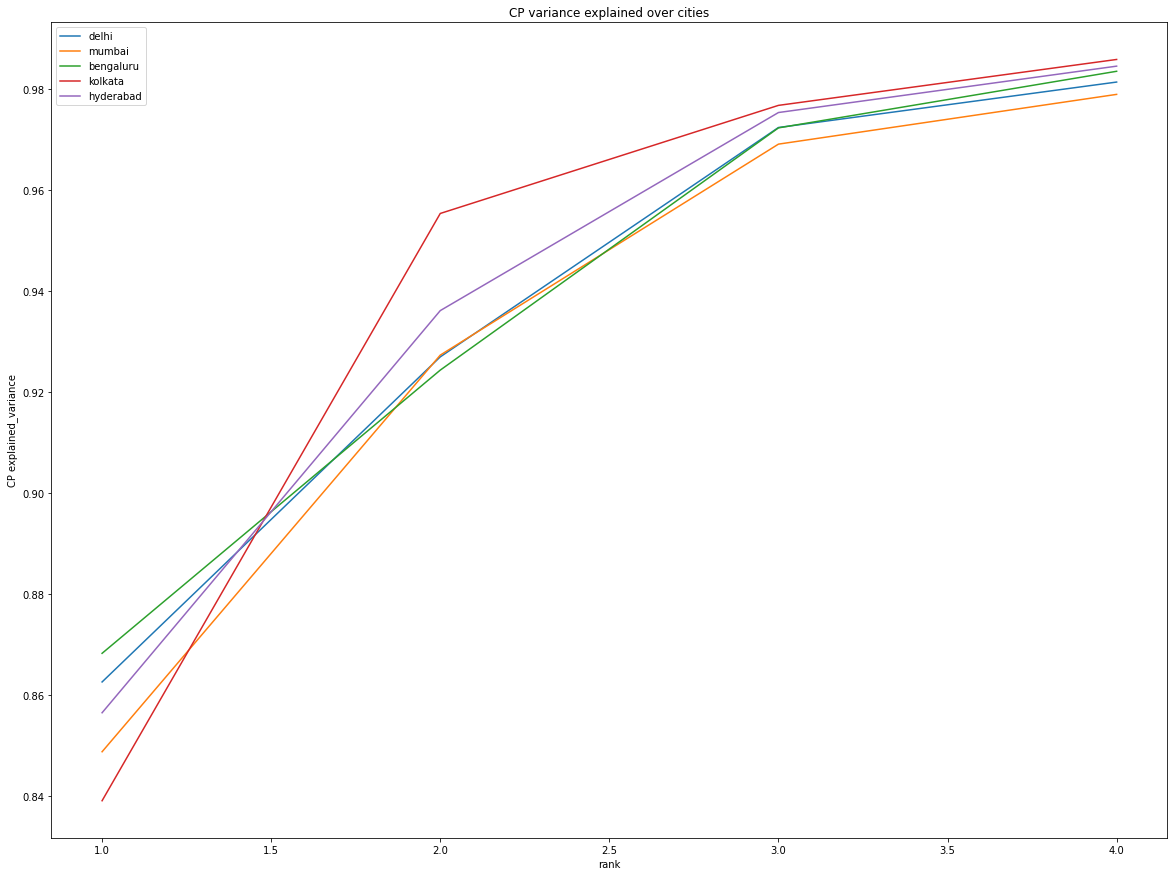

In [18]:
ax = cities_cp.plot()
ax.set(xlabel='rank', ylabel='CP explained_variance')
plt.title('CP variance explained over cities')

Text(0.5, 1.0, 'Tucker variance explained over cities')

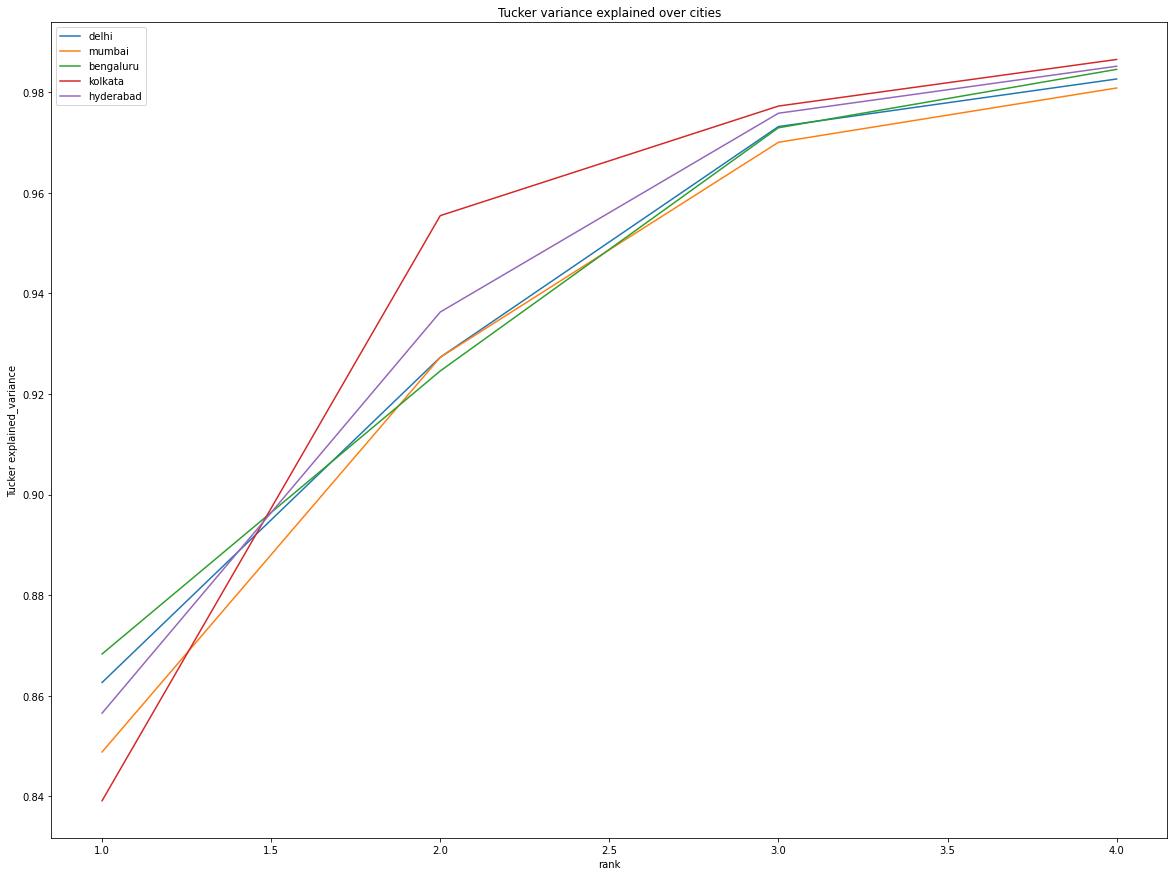

In [19]:
ax=cities_tucker.plot()
ax.set(xlabel='rank', ylabel='Tucker explained_variance')
plt.title('Tucker variance explained over cities')